In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as mt
from numpy import genfromtxt
from numpy import linalg as LA
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from numpy import ma

from sklearn.ensemble import RandomForestClassifier

import graphviz
from sklearn import tree

In [2]:
df = pd.read_csv('OnlineNewsPopularity.csv')
df = df.loc[:, ' timedelta':]
dfx = df.loc[:, ' timedelta':' abs_title_sentiment_polarity']
dfy = df.loc[:, ' shares']

data = df.as_matrix(columns=None)

data = data[data[:,3]<1]

c = np.array([10,19,43,44,45,47,48,49,52])
for i in c:
    data = data[data[:,i]!=0]

'''
c = np.array([2,6,7,8,9,21,25,26,27,28,29,38,39,40,41,42,46])
for i in c:
    if (LA.norm(data[:,i],0)==data[:,i].shape):
        data[:,i] = np.log(data[:,i])
    else:
        data[:,i] = np.sqrt(data[:,i])
'''
# eliminate unvalid data
#c = np.array([18,20,22,24])
#data = np.delete(data, c, 1)

# pre eliminate unvalid and unuseful features
#c = np.array([12,13,14,15,16,17,18,20,22,24,30,31,32,33,34,35,36,37])
#data = np.delete(data, c, 1)

my_data = np.copy(data)
datax = my_data[:,:my_data.shape[1]-1]
datay = my_data[:,my_data.shape[1]-1]
for j in range(0,datay.shape[0]):
    if datay[j] >1400:
        datay[j] =1
    else:
        datay[j] =0
        
datax_train = datax[:int(datax.shape[0]*3/4),:]
datay_train = datay[:int(datay.shape[0]*3/4)]

datax_test = datax[int(datax.shape[0]*3/4):,:]
datay_test = datay[int(datay.shape[0]*3/4):]

In [288]:
myscorerf = 0.5
var_i =0
var_j=0
var_k=0
for i in range(5,25):
    for j in range(2,10):
        for k in range(0,2):
            clf = RandomForestClassifier(n_estimators=i, criterion='entropy', max_depth=j, random_state=k)
            clf.fit(datax_train, datay_train)
            temp = clf.score(datax_test,datay_test)
            if temp> myscorerf:
                myscorerf = temp
                var_i=i
                var_j=j
                var_k=k
myscorerf

0.68232440180835818

In [284]:
myscorerf

0.67879589811445584

In [291]:
var_j

7

In [3]:
clf = RandomForestClassifier(n_estimators=17, criterion='entropy', max_depth=7, random_state=0)
clf.fit(datax_train, datay_train)
clf.score(datax_test,datay_test)

0.68232440180835818

In [298]:
features = dfx.columns
targetnames = ['unpopular','popular']
dot_data = tree.export_graphviz(clf.estimators_[2], out_file=None,feature_names=features,class_names=targetnames,  
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = graphviz.Source(dot_data) 
graph.render("randomforest_20_7")

'randomforest_20_7.pdf'

In [107]:
targetnames = ['popular','nonpopular']

In [270]:
clf.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=209652396, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=398764591, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weig

In [4]:
clf.feature_importances_

array([ 0.03456064,  0.00371937,  0.01781675,  0.02094619,  0.        ,
        0.01559615,  0.0141606 ,  0.00574928,  0.00830045,  0.00451624,
        0.0051735 ,  0.00120803,  0.00058102,  0.0418135 ,  0.0059673 ,
        0.02113337,  0.01677993,  0.04117648,  0.01371671,  0.00917015,
        0.0158539 ,  0.01268618,  0.01315569,  0.01479447,  0.03001475,
        0.06380168,  0.13129102,  0.06762921,  0.02373672,  0.05376533,
        0.00035177,  0.00073176,  0.00134916,  0.00030382,  0.00023984,
        0.01992453,  0.00500764,  0.04201653,  0.02033576,  0.02351034,
        0.03704048,  0.00947552,  0.02185575,  0.01390142,  0.01661184,
        0.01043043,  0.00570417,  0.01058788,  0.00759636,  0.00553387,
        0.01145448,  0.00268238,  0.0046393 ,  0.00352468,  0.00341912,
        0.00336343,  0.00411496,  0.00280524,  0.00267291])

In [6]:
vip_features = np.zeros([int(LA.norm(clf.feature_importances_,0)),2])
j=0
for i in range (0,clf.feature_importances_.shape[0]):
    if clf.feature_importances_[i]!=0:
        vip_features[j,0] = i
        vip_features[j,1] = clf.feature_importances_[i]
        j+=1

In [7]:
clf.feature_importances_.shape

(59,)

In [8]:
vip_features

array([[  0.00000000e+00,   3.45606386e-02],
       [  1.00000000e+00,   3.71937218e-03],
       [  2.00000000e+00,   1.78167509e-02],
       [  3.00000000e+00,   2.09461893e-02],
       [  5.00000000e+00,   1.55961535e-02],
       [  6.00000000e+00,   1.41606031e-02],
       [  7.00000000e+00,   5.74927981e-03],
       [  8.00000000e+00,   8.30045264e-03],
       [  9.00000000e+00,   4.51624089e-03],
       [  1.00000000e+01,   5.17349577e-03],
       [  1.10000000e+01,   1.20803383e-03],
       [  1.20000000e+01,   5.81019163e-04],
       [  1.30000000e+01,   4.18135014e-02],
       [  1.40000000e+01,   5.96729638e-03],
       [  1.50000000e+01,   2.11333732e-02],
       [  1.60000000e+01,   1.67799268e-02],
       [  1.70000000e+01,   4.11764835e-02],
       [  1.80000000e+01,   1.37167109e-02],
       [  1.90000000e+01,   9.17014722e-03],
       [  2.00000000e+01,   1.58539034e-02],
       [  2.10000000e+01,   1.26861812e-02],
       [  2.20000000e+01,   1.31556907e-02],
       [  

## Logistic regression with random forest features

In [9]:
my_data = np.copy(data)
datax = my_data[:,vip_features[:,0].astype(int)]
datay = my_data[:,my_data.shape[1]-1]
for j in range(0,datay.shape[0]):
    if datay[j] >1400:
        datay[j] =1
    else:
        datay[j] =0
        
datax_train = datax[:int(datax.shape[0]*3/4),:]
datay_train = datay[:int(datay.shape[0]*3/4)]

datax_test = datax[int(datax.shape[0]*3/4):,:]
datay_test = datay[int(datay.shape[0]*3/4):]

In [10]:
clf = RandomForestClassifier(max_depth=7, random_state=0)
clf.fit(datax_train, datay_train)
clf.score(datax_test,datay_test)

0.67063623332230671

In [11]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(datax_train, datay_train) 
lr.score(datax_test, datay_test) 

0.63535119638328375

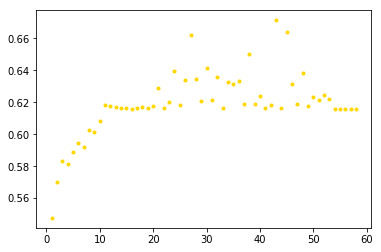

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
myscores = np.zeros(datax_train.shape[1])
for i in range(1,datax_train.shape[1]+1):
    pca = PCA(n_components=i) 
    lr = LogisticRegression() 
    X_train_pca = pca.fit_transform(datax_train) 
    X_test_pca = pca.transform(datax_test) 
    lr.fit(X_train_pca, datay_train) 
    score = lr.score(X_test_pca, datay_test) 
    myscores[i-1] = score 
    plt.plot(i,score,'ro',c='gold',markersize = 3)
plt.show()

In [16]:
myscores

array([ 0.54757967,  0.57018414,  0.5831955 ,  0.58132098,  0.58892932,
        0.59444261,  0.59190649,  0.60249201,  0.60138935,  0.60800529,
        0.6185908 ,  0.61737788,  0.61715735,  0.61649575,  0.61616496,
        0.61583416,  0.61671629,  0.61682655,  0.61638549,  0.61792921,
        0.62884552,  0.61660602,  0.62035506,  0.63976183,  0.61848054,
        0.63424854,  0.66247657,  0.6346896 ,  0.62068585,  0.64163634,
        0.62123718,  0.63579226,  0.61616496,  0.63281508,  0.6311611 ,
        0.63303562,  0.6189216 ,  0.65001654,  0.61870107,  0.62421436,
        0.61660602,  0.61848054,  0.67140809,  0.61649575,  0.66424082,
        0.6311611 ,  0.61914213,  0.63843864,  0.61737788,  0.62355276,
        0.62156798,  0.62465542,  0.62222957,  0.61605469,  0.61605469,
        0.61605469,  0.61605469,  0.61605469])

## Try online learning

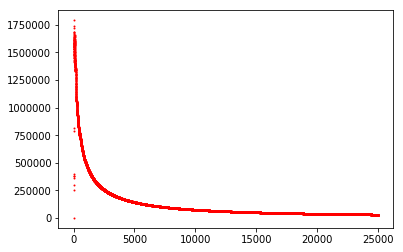

In [176]:
t=1
pt = np.ones(datax.shape[1])/datax.shape[1]
b=0.0000000001
steps = datax.shape[0]
steps = 25000
iterLoss = np.zeros(datax.shape[0])
for j in range(0,steps):
    iterLoss[j] = np.square(np.sum(np.multiply(datax[j,:] , pt))-datay[j])
    for i in range(0,datax.shape[1]):
        loss = np.square(datax[j,i]-datay[j])
        pt[i] = pt[i]*np.power(np.exp(1),(-b * loss))
    pt = pt/np.sum(pt)

lt = np.zeros(datax.shape[0])
for j in range(0,steps):
    for i in range(0,j):
        lt[j]+= iterLoss[i]
    lt[j]=lt[j]/(j+1)
    plt.plot(j,lt[j],'ro',c='r',markersize = 1)
plt.show()

In [177]:
lt[j]

30313.001531957532

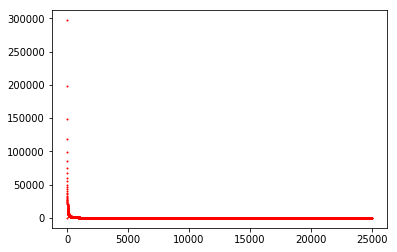

In [200]:
t=1
pt = np.ones(datax.shape[1])/datax.shape[1]
b=0.1
steps = datax.shape[0]
steps = 25000
iterLoss = np.zeros(datax.shape[0])
for j in range(0,steps):
    iterLoss[j] = np.square(np.sum(np.multiply(datax[j,:] , pt))-datay[j])
    for i in range(0,datax.shape[1]):
        loss = np.square(datax[j,i]-datay[j])
        pt[i] = pt[i]*np.power(np.exp(1),(-b * loss))
    pt = pt/np.sum(pt)

lt = np.zeros(datax.shape[0])
for j in range(0,steps):
    for i in range(0,j):
        lt[j]+= iterLoss[i]
    lt[j]=lt[j]/(j+1)
    plt.plot(j,lt[j],'ro',c='r',markersize = 1)
plt.show()

In [201]:
lt[j]

24.403063663486691

In [202]:
np.dot(datax[2500,:],pt)

0.8666666666670001

In [210]:
matches = 0
for i in range (datax_test.shape[0]):
    y_pred = np.dot(datax[i,:],pt)
    if y_pred <2:
        y_pred =0
    else:
        y_pred = 1
    if y_pred == datay_test[i]:
        matches+=1
matches/datax_test.shape[0]

0.5471386040357261

## Regression

In [238]:
df = pd.read_csv('OnlineNewsPopularity.csv')
df = df.loc[:, ' timedelta':]
dfx = df.loc[:, ' timedelta':' abs_title_sentiment_polarity']
dfy = df.loc[:, ' shares']

data = df.as_matrix(columns=None)

data = data[data[:,3]<1]

c = np.array([10,19,43,44,45,47,48,49,52])
for i in c:
    data = data[data[:,i]!=0]

c = np.array([2,6,7,8,9,21,25,26,27,28,29,38,39,40,41,42,46,59])
for i in c:
    if (LA.norm(data[:,i],0)==data[:,i].shape):
        data[:,i] = np.log(data[:,i])
    else:
        data[:,i] = np.sqrt(data[:,i])
# eliminate unvalid data
#c = np.array([18,20,22,24])
#data = np.delete(data, c, 1)

# pre eliminate unvalid and unuseful features
#c = np.array([12,13,14,15,16,17,18,20,22,24,30,31,32,33,34,35,36,37])
#data = np.delete(data, c, 1)

my_data = np.copy(data)
datax = my_data[:,vip_features[:,0].astype(int)]
datay = my_data[:,my_data.shape[1]-1]
        
datax_train = datax[:int(datax.shape[0]*3/4),:]
datay_train = datay[:int(datay.shape[0]*3/4)]

datax_test = datax[int(datax.shape[0]*3/4):,:]
datay_test = datay[int(datay.shape[0]*3/4):]

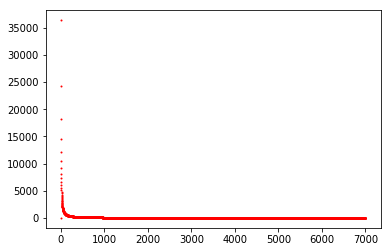

In [220]:
t=1
pt = np.ones(datax_train.shape[1])/datax_train.shape[1]
b=0.1
steps = datax_train.shape[0]
steps = 7000
iterLoss = np.zeros(datax_train.shape[0])
for j in range(0,steps):
    iterLoss[j] = np.square(np.sum(np.multiply(datax_train[j,:] , pt))-datay_train[j])
    for i in range(0,datax_train.shape[1]):
        loss = np.square(datax_train[j,i]-datay_train[j])
        pt[i] = pt[i]*np.power(np.exp(1),(-b * loss))
    pt = pt/np.sum(pt)

lt = np.zeros(datax_train.shape[0])
for j in range(0,steps):
    for i in range(0,j):
        lt[j]+= iterLoss[i]
    lt[j]=lt[j]/(j+1)
    plt.plot(j,lt[j],'ro',c='r',markersize = 1)
plt.show()

In [221]:
lt[j]

11.240456499179764

In [224]:
matches = 0
for i in range (datax_test.shape[0]):
    y_pred = np.dot(datax_test[i,:],pt)
    if y_pred <np.log(1400):
        y_pred =0
    else:
        y_pred = 1
    y_test = 1
    if datay_test[i] <np.log(1400):
        y_test =0
    if y_pred == y_test:
        matches+=1
matches/datax_test.shape[0]

0.49807034954239715

In [217]:
np.log(3)

1.0986122886681098

In [223]:
pt

array([  0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   4.52234585e-186,   1.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   0.00000000e+000])

## linear regression

In [258]:
df = pd.read_csv('OnlineNewsPopularity.csv')
df = df.loc[:, ' timedelta':]
dfx = df.loc[:, ' timedelta':' abs_title_sentiment_polarity']
dfy = df.loc[:, ' shares']

data = df.as_matrix(columns=None)

data = data[data[:,3]<1]

c = np.array([10,19,43,44,45,47,48,49,52])
for i in c:
    data = data[data[:,i]!=0]

c = np.array([2,6,7,8,9,21,25,26,27,28,29,38,39,40,41,42,46,59])
for i in c:
    if (LA.norm(data[:,i],0)==data[:,i].shape):
        data[:,i] = np.log(data[:,i])
    else:
        data[:,i] = np.sqrt(data[:,i])

# eliminate unvalid data
c = np.array([18,20,22,24])
data = np.delete(data, c, 1)

# pre eliminate unvalid and unuseful features
c = np.array([12,13,14,15,16,17,18,20,22,24,30,31,32,33,34,35,36,37])
data = np.delete(data, c, 1)

my_data = np.copy(data)
datax = my_data[:,:my_data.shape[1]-1]
datay = my_data[:,my_data.shape[1]-1]
        
datax_train = datax[:int(datax.shape[0]*3/4),:]
datay_train = datay[:int(datay.shape[0]*3/4)]

datax_test = datax[int(datax.shape[0]*3/4):,:]
datay_test = datay[int(datay.shape[0]*3/4):]

In [259]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(datax_train,datay_train)
lr.score(datax_test, datay_test)

0.10859462844554102

In [262]:
matches = 0
for i in range (datax_test.shape[0]):
    y_pred = np.dot(datax_test[i,:],lr.coef_)
    if y_pred <np.log(1400):
        y_pred =0
    else:
        y_pred = 1
    y_test = 1
    if datay_test[i] <np.log(1400):
        y_test =0
    if y_pred == y_test:
        matches+=1
matches/datax_test.shape[0]

0.5028117763810784

In [261]:
lr = linear_model.Ridge(alpha=1)
lr.fit(datax_train,datay_train)
lr.score(datax_test, datay_test)

0.10879726608806328